In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import json
import random
import scipy
import sklearn
import string
from sklearn import linear_model

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
connect_4 = fetch_ucirepo(id=26) 
  
# data (as pandas dataframes) 
X = connect_4.data.features 
y = connect_4.data.targets 

In [3]:
connect4_data = X
connect4_data['outcome'] = y['class']
connect4_data = connect4_data[connect4_data['outcome'] != 'draw']

In [4]:
grid = [['a6', 'b6', 'c6', 'd6', 'e6', 'f6', 'g6'],
        ['a5', 'b5', 'c5', 'd5', 'e5', 'f5', 'g5'],
        ['a4', 'b4', 'c4', 'd4', 'e4', 'f4', 'g4'],
        ['a3', 'b3', 'c3', 'd3', 'e3', 'f3', 'g3'],
        ['a2', 'b2', 'c2', 'd2', 'e2', 'f2', 'g2'],
        ['a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1']]

In [5]:
def color(state):
    if state == 'x': return (166/255,66/255,64/255) # 'A63D40'
    elif state == 'o': return (233/255,184/255,114/255) # 'E9B872'
    else: return (21/255,21/255,21/255) # '151515'

In [6]:
def draw_a_board(df, index):
    """
    return the board of a sample configuration
    """
    board = df.iloc[index].to_dict()
    
    # global vars 
    rows, cols = 6, 7
    circle_radius = 1.5
    x_spacing, y_spacing = 3.1, 3.1

    # set axis limits and equal aspect ratio
    plt.axis("off")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis([0, (cols + 1) * x_spacing, 0, (rows + 1) * y_spacing])
    
    # draw connect-4 grid
    for row in range(rows):
        for col in range(cols):
            x = (col + 1) * x_spacing
            y = (rows - row) * y_spacing
            col = color(board[grid[row][col]])
            circle = plt.Circle((x, y), radius=circle_radius, color=col, alpha=1, linewidth=0)
            plt.gca().add_artist(circle)

    # display
    plt.show()

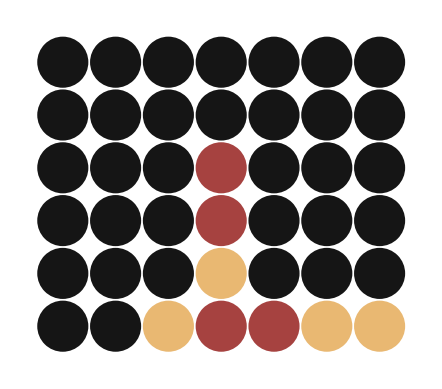

In [7]:
draw_a_board(connect4_data, 550)